In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

In [2]:
!pip -q install kaggle
from google.colab import files
files.upload()  # Subí tu archivo kaggle.json descargado
!mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic -p data
!unzip -o data/titanic.zip -d data

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Saving kaggle.json to kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 97.4MB/s]
Archive:  data/titanic.zip
  inflating: data/gender_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [4]:
train.shape, train.columns
train.head(3)
train.info()
train.describe(include='all').T
train.isna().sum().sort_values(ascending=False)
train['Survived'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,proportion
Survived,
0,0.616162
1,0.383838


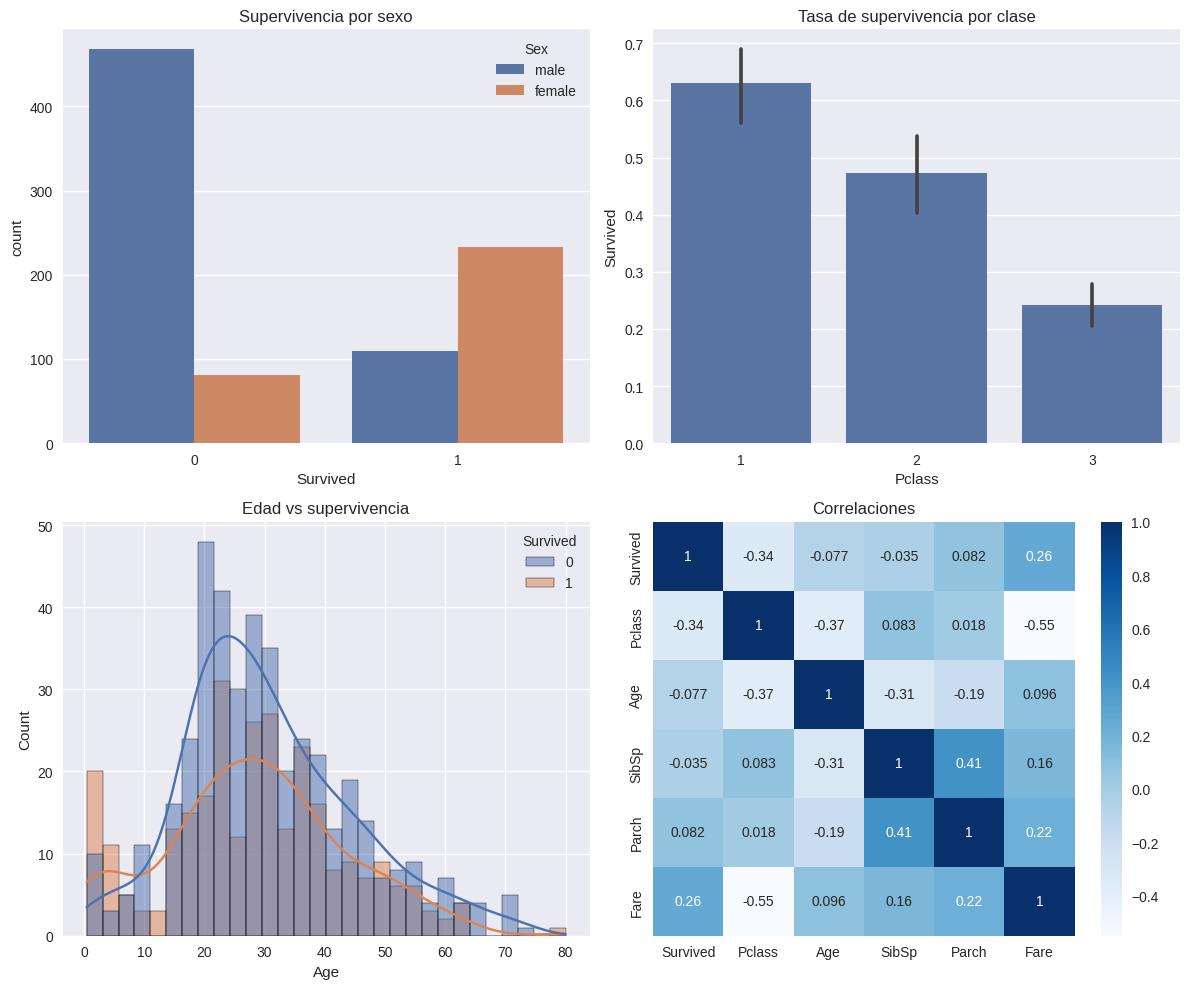

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Supervivencia global por sexo
sns.countplot(data=train, x='Survived', hue='Sex', ax=axes[0,0])
axes[0,0].set_title('Supervivencia por sexo')

# Tasa de supervivencia por clase
sns.barplot(data=train, x='Pclass', y='Survived', estimator=np.mean, ax=axes[0,1])
axes[0,1].set_title('Tasa de supervivencia por clase')

# Distribución de edad por supervivencia
sns.histplot(data=train, x='Age', hue='Survived', kde=True, bins=30, ax=axes[1,0])
axes[1,0].set_title('Edad vs supervivencia')

# Correlaciones numéricas
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='Blues', ax=axes[1,1])
axes[1,1].set_title('Correlaciones')

plt.tight_layout()
plt.show()